In [2]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
# ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test_ocng_w_no_b.nc") #i=103
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_base_test.nc") #i=103

In [4]:
f = 2*(7.292115*10**(-5)*np.sin(np.pi/4))
20*(2*np.pi)/f

1218544.3971079355

In [8]:
ocean_data.time[-1]

<xarray.DataArray 'time' ()>
array(450861426929936, dtype='timedelta64[ns]')
Coordinates:
    time     timedelta64[ns] 5 days 05:14:21.426929936
Attributes:
    longname:  Time

In [6]:
tf =int(5*2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4))))*10**(8) #314159
tf2 = int(2*2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4))))*10**(8)
dt = 2*np.pi/(2*(7.292115*10**(-5)*np.sin(np.pi/4)))*10**(8)
print(tf)

30463600000000


In [7]:
ocean_data.time[101]

IndexError: index 101 is out of bounds for axis 0 with size 76

In [ ]:
# dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])
dot_prod = np.square((ocean_data["u"])).mean(dim=["yC","zC"])+np.square((ocean_data["v"])).mean(dim=["yF","zC"])+np.square(ocean_data["w"]).mean(dim=["yC","zF"])

KE = 0.5*dot_prod
KE5 = KE.isel(time=103)
dta = KE/KE5

In [8]:
dta.coords['time_norm'] = dta.time*(f/(2*np.pi))
dta = dta.swap_dims({'time':'time_norm'})

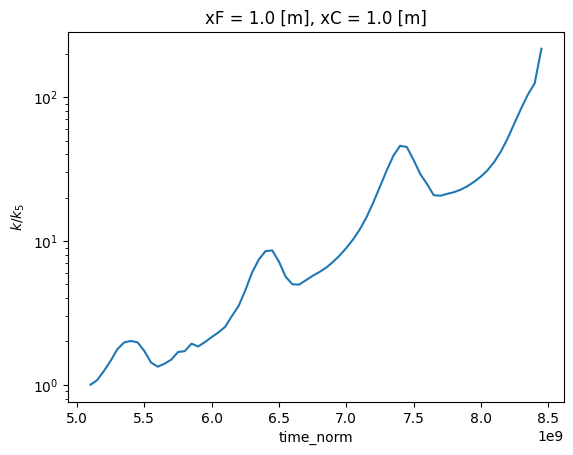

In [9]:
# dt = dta.isel(time=[103,105])
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
dtb = dta.isel(time_norm=slice(103,187)) # for old case 103,187 # for 10_7 101, 173
dtb.plot(ax=axs)
axs.set_yscale("log")
plt.ylabel("$k/k_5$")
plt.show()

In [10]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
B = (ocean_data.N2)**(1/2)
N = B
mean_N= N.mean(dim=["yC","zC"])
N_f = mean_N/f
N_f.coords['time_norm'] = N_f.time*(f/(2*np.pi))
N_f = N_f.swap_dims({'time':'time_norm'})
N_f = N_f.isel(time_norm=slice(0,40))

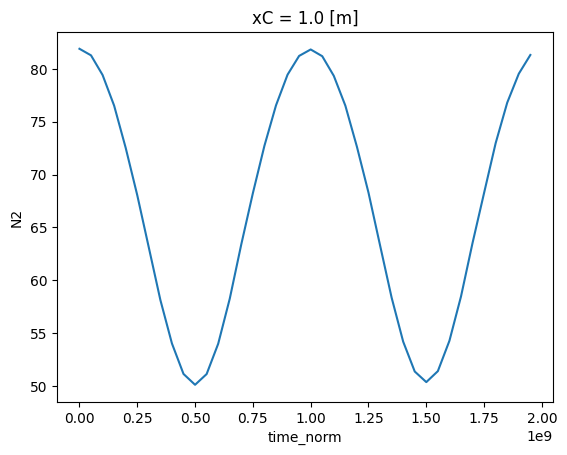

In [11]:
N_f.plot()

In [12]:
gamma = 0.6
S_2 = (7.7*f)**2
phi = 0
u_ag_shear =  gamma*(S_2/f)*np.cos(phi)
v_ag_shear =  gamma*(S_2/f)*np.sin(phi)
AGSP=-1*(ocean_data.u).mean(dim=["yC","zC"])*(ocean_data.w).mean(dim=["yC","zF"])*u_ag_shear-(ocean_data.v).mean(dim=["yF","zC"])*(ocean_data.w).mean(dim=["yC","zF"])*v_ag_shear

In [23]:
x = []
for i in range(40):
    ds = np.multiply(ocean_data.u.isel(time=i),ocean_data.w.isel(time=i))
    x.append(ds)
# x.append(np.multiply(ocean_data.u.isel(time=0),ocean_data.w.isel(time=0)))
combined = xr.concat(x,dim='pert_mult')

In [24]:
combined = combined.drop(['zF','xC'])
combined = combined.mean(dim=["yC","zC"])

: 

In [ ]:
combined

<xarray.DataArray 'u' (pert_mult: 40, zC: 200, yC: 1024, xF: 1, zF: 201, xC: 1)>
array([[[[[[-0.00000000e+00],
           [ 3.11244730e-10],
           [ 1.87085398e-10],
           ...,
           [-1.14259731e-09],
           [-1.76160070e-10],
           [-0.00000000e+00]]],


         [[[ 0.00000000e+00],
           [ 1.75531104e-09],
           [ 1.07519882e-09],
           ...,
           [-1.67886620e-09],
           [-1.86741774e-09],
           [ 0.00000000e+00]]],


         [[[ 0.00000000e+00],
           [ 3.88983790e-09],
...
           [-6.19072322e-07],
           [ 0.00000000e+00]]],


         [[[ 0.00000000e+00],
           [ 3.03260406e-06],
           [ 6.85273796e-06],
           ...,
           [ 1.26967334e-06],
           [ 1.00160090e-06],
           [ 0.00000000e+00]]],


         [[[ 0.00000000e+00],
           [ 1.75419247e-06],
           [ 1.39914438e-06],
           ...,
           [-7.76972721e-07],
           [-6.73517173e-07],
           [ 0.00000000e+00]]]]]])
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
  * yC       (yC) float64 1.465 4.395 7.324 ... 2.993e+03 2.996e+03 2.999e+03
    time     (pert_mult) timedelta64[ns] 00:00:00 ... 1 days 09:00:08.078718024
  * zF       (zF) float64 -200.0 -199.0 -198.0 -197.0 ... -3.0 -2.0 -1.0 0.0
  * xC       (xC) float64 1.0
Dimensions without coordinates: pert_mult, xF
Attributes:
    units:     m/s
    longname:  Velocity in the x-direction

ValueError: x and y can be no greater than 2D, but have shapes (40,) and (40, 1, 201, 1)

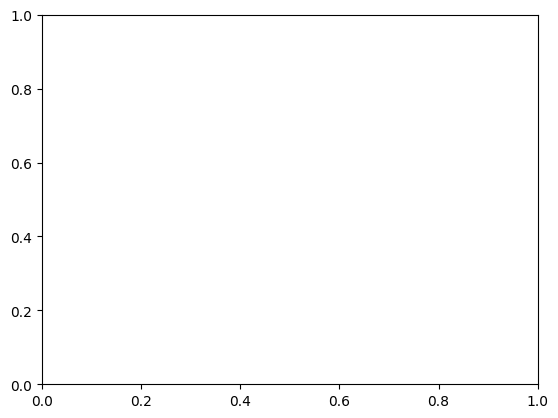

In [26]:
plt.plot(combined.pert_mult,combined)

In [15]:
x.mean(dim=["yC","zC"])

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
u = ocean_data.u + ocean_data.U
v = ocean_data.v + ocean_data.V
w = ocean_data.w
z = ocean_data.zC

In [ ]:
u_s =  (u-u.mean(["zC"])).mean(dim=["yC"])-S_2*z/f
v_s = (v-v.mean(["zC"])).mean(dim=["yF"])
w_s = (w-w.mean("zF")).mean(dim=["yC"])

In [ ]:
K = 0.5*(np.square(u_s)+np.square(v_s)+np.square(w_s))

In [ ]:
K

<xarray.DataArray (time: 412, zC: 200, xF: 1, xC: 1, zF: 201)>
array([[[[[0.03035828, 0.03035828, 0.03035828, ..., 0.03035828,
           0.03035828, 0.03035828]]],


        [[[0.03127045, 0.03127045, 0.03127045, ..., 0.03127045,
           0.03127045, 0.03127045]]],


        [[[0.03219433, 0.03219433, 0.03219433, ..., 0.03219433,
           0.03219433, 0.03219433]]],


        ...,


        [[[0.46959745, 0.46959745, 0.46959745, ..., 0.46959745,
           0.46959745, 0.46959745]]],


        [[[0.47315836, 0.47315836, 0.47315836, ..., 0.47315836,
...
           0.12056988, 0.12056988]]],


        [[[0.12271713, 0.12271713, 0.12271713, ..., 0.12271713,
           0.12271713, 0.12271713]]],


        ...,


        [[[0.25172466, 0.25172466, 0.25172466, ..., 0.25172466,
           0.25172466, 0.25172466]]],


        [[[0.25191801, 0.25191801, 0.25191801, ..., 0.25191801,
           0.25191801, 0.25191801]]],


        [[[0.25354737, 0.25354737, 0.25354737, ..., 0.25354737,
           0.25354737, 0.25354737]]]]])
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
  * xF       (xF) float64 1.0
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 01:38:18.036115166
  * xC       (xC) float64 1.0
  * zF       (zF) float64 -200.0 -199.0 -198.0 -197.0 ... -3.0 -2.0 -1.0 0.0

TypeError: The DTypes <class 'numpy.dtype[timedelta64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

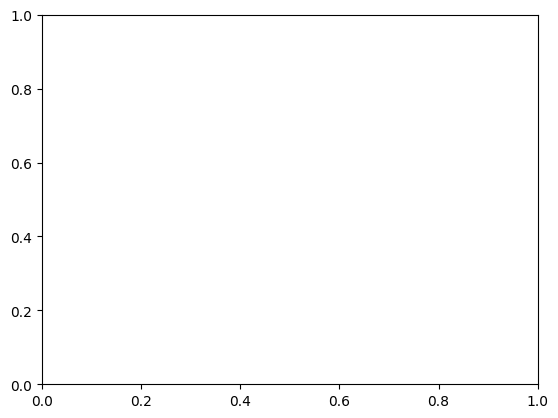

In [ ]:
K.plot()

In [ ]:
delta_T= np.gradient(AGSP.time)
int_val = []
for j in range(1,len(AGSP.time)):
    int_val.append(AGSP.isel(time=slice(0,j)).integrate("time",datetime_unit="s"))
# AGSP.sel().integrate("time",datetime_unit="s")
int_val = [i[0,0] for i in int_val]

In [ ]:
int_val[0]

<xarray.DataArray ()>
array(0.)
Coordinates:
    xF       float64 1.0
    xC       float64 1.0